In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from scipy.io import loadmat
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import regularizers as rl

In [2]:
os.chdir(r"C:\Users\user\Desktop\uoc\ml\Tensorflow")

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

In [3]:
X_train_raw = train['X']
y_train_raw = train['y']
X_test_raw = test['X']
y_test_raw = test['y']

In [4]:
X_train_raw = np.moveaxis(X_train_raw, -1, 0)
X_test_raw = np.moveaxis(X_test_raw, -1, 0)

In [5]:
y_train = np.array([np.where(i == [10],[0],i) for i in y_train_raw])
y_test = np.array([np.where(i == [10],[0],i) for i in y_test_raw])

print (X_train_raw.shape, y_train.shape, X_test_raw.shape, y_test.shape)

(73257, 32, 32, 3) (73257, 1) (26032, 32, 32, 3) (26032, 1)


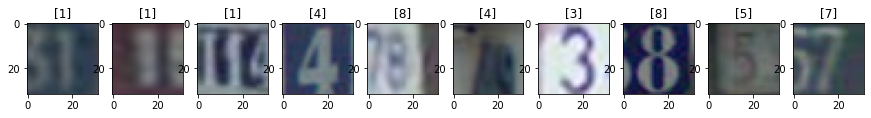

In [6]:
fig,ax = plt.subplots(1,10, figsize = (15,3))

index = [random.randint(1,len(X_train_raw)) for i in range(10)]

for i in range(len(index)):
    ax[i].imshow(X_train_raw[index[i],:,:,:])
    ax[i].title.set_text('{}'.format(y_train[index[i]]))
plt.show()

In [7]:
X_train = np.mean(X_train_raw, axis = 3)
X_test = np.mean(X_test_raw, axis = 3)

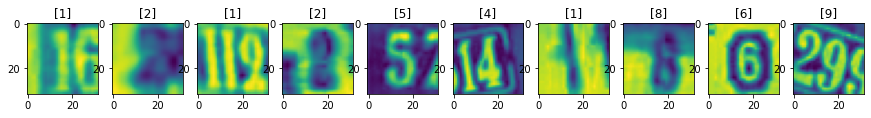

In [8]:
fig,ax = plt.subplots(1,10, figsize = (15,3))

index = [random.randint(1,len(X_train)) for i in range(10)]

for i in range(len(index)):
    ax[i].imshow(X_train[index[i],:,:])
    ax[i].title.set_text('{}'.format(y_train[index[i]]))
plt.show()

In [48]:
model = Sequential([
    Flatten(input_shape = X_train[1].shape),
    Dense(1024,activation = 'relu'),
    Dense(512,activation = 'relu'),
    Dense(256,activation = 'relu'),
    Dense(128,activation = 'relu'),
    Dense(10,activation = 'softmax')
    
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 1,739,914
Trainable params: 1,739,914
Non-trainable params: 0
____________________________________________

In [55]:
path = 'mlp_model_checkpoints/chechpoint'
checkpoint_mlp = ModelCheckpoint(path, save_weights_only=True,verbose=1,save_best_only=True,
                             monitor='val_accuracy',
                             save_freq='epoch')

In [57]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [58]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 64, validation_split = 0.15, callbacks = [checkpoint_mlp])

Epoch 1/30
972/973 [============================>.] - ETA: 0s - loss: 6.1265 - accuracy: 0.2463
Epoch 00001: val_accuracy improved from -inf to 0.43534, saving model to mlp_model_checkpoints\chechpoint
973/973 [==============================] - 19s 20ms/step - loss: 6.1223 - accuracy: 0.2465 - val_loss: 1.6876 - val_accuracy: 0.4353
Epoch 2/30
972/973 [============================>.] - ETA: 0s - loss: 1.4537 - accuracy: 0.5205
Epoch 00002: val_accuracy improved from 0.43534 to 0.52889, saving model to mlp_model_checkpoints\chechpoint
973/973 [==============================] - 19s 19ms/step - loss: 1.4535 - accuracy: 0.5206 - val_loss: 1.4090 - val_accuracy: 0.5289
Epoch 3/30
973/973 [==============================] - ETA: 0s - loss: 1.2636 - accuracy: 0.5975
Epoch 00003: val_accuracy improved from 0.52889 to 0.62472, saving model to mlp_model_checkpoints\chechpoint
973/973 [==============================] - 20s 21ms/step - loss: 1.2636 - accuracy: 0.5975 - val_loss: 1.1726 - val_accura

972/973 [============================>.] - ETA: 0s - loss: 0.7031 - accuracy: 0.7848
Epoch 00026: val_accuracy did not improve from 0.77532
973/973 [==============================] - 22s 23ms/step - loss: 0.7031 - accuracy: 0.7848 - val_loss: 0.7771 - val_accuracy: 0.7683
Epoch 27/30
973/973 [==============================] - ETA: 0s - loss: 0.7014 - accuracy: 0.7839 ETA: 0s - loss: 0.702
Epoch 00027: val_accuracy did not improve from 0.77532
973/973 [==============================] - 22s 22ms/step - loss: 0.7014 - accuracy: 0.7839 - val_loss: 0.8207 - val_accuracy: 0.7662
Epoch 28/30
972/973 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.7891 ETA: 0s - loss:
Epoch 00028: val_accuracy did not improve from 0.77532
973/973 [==============================] - 22s 23ms/step - loss: 0.6861 - accuracy: 0.7891 - val_loss: 0.8061 - val_accuracy: 0.7644
Epoch 29/30
971/973 [============================>.] - ETA: 0s - loss: 0.6785 - accuracy: 0.7920 ETA: 0s - loss: 0.6791

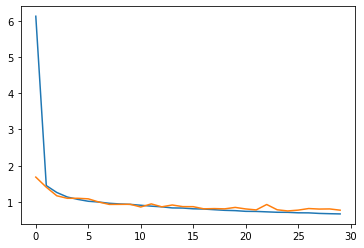

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

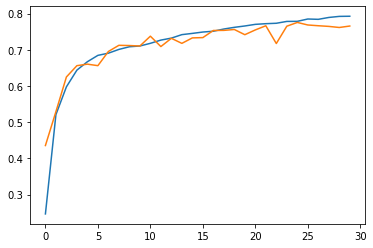

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)

print (loss, accuracy)

814/814 [==============================] - 4s 5ms/step - loss: 0.8992 - accuracy: 0.7445
0.8991660475730896 0.7445451617240906


In [68]:
cnn_model = Sequential([
    Conv2D(32,(3,3),padding = 'SAME', activation = 'relu', input_shape = X_train_raw[0].shape),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3),padding = 'SAME',activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(16,(3,3),padding = 'SAME',activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.2),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(10,activation = 'softmax')
       
])

cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 16)        4624      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)              

In [69]:
path = 'cnn_model_checkpoints/chechpoint'
checkpoint = ModelCheckpoint(path, save_weights_only=True,verbose=1,save_best_only=True,
                             monitor='val_accuracy',
                             save_freq='epoch')

In [70]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 4)

In [71]:
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [72]:
history_cnn = cnn_model.fit(X_train_raw, y_train, epochs = 30, batch_size = 64, validation_split = 0.15, callbacks=[checkpoint,early_stopping])

Epoch 1/30
973/973 [==============================] - ETA: 0s - loss: 1.7297 - accuracy: 0.4537
Epoch 00001: val_accuracy improved from -inf to 0.62908, saving model to cnn_model_checkpoints\chechpoint
973/973 [==============================] - 76s 78ms/step - loss: 1.7297 - accuracy: 0.4537 - val_loss: 1.1669 - val_accuracy: 0.6291
Epoch 2/30
973/973 [==============================] - ETA: 0s - loss: 1.0924 - accuracy: 0.6464
Epoch 00002: val_accuracy improved from 0.62908 to 0.71144, saving model to cnn_model_checkpoints\chechpoint
973/973 [==============================] - 81s 83ms/step - loss: 1.0924 - accuracy: 0.6464 - val_loss: 0.9267 - val_accuracy: 0.7114
Epoch 3/30
973/973 [==============================] - ETA: 0s - loss: 0.9583 - accuracy: 0.6926
Epoch 00003: val_accuracy improved from 0.71144 to 0.73874, saving model to cnn_model_checkpoints\chechpoint
973/973 [==============================] - 81s 83ms/step - loss: 0.9583 - accuracy: 0.6926 - val_loss: 0.8203 - val_accura

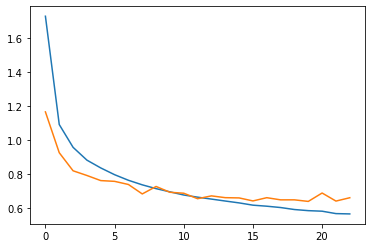

In [73]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.show()

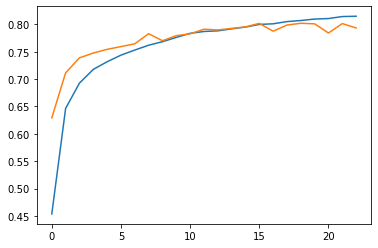

In [74]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.show()

In [75]:
loss, accuracy = cnn_model.evaluate(X_test_raw, y_test)

print (loss, accuracy)

814/814 [==============================] - 10s 13ms/step - loss: 0.7065 - accuracy: 0.7845
0.7064658999443054 0.7845343947410583


In [77]:
model.load_weights('mlp_model_checkpoints/chechpoint')

cnn_model.load_weights('cnn_model_checkpoints/chechpoint')

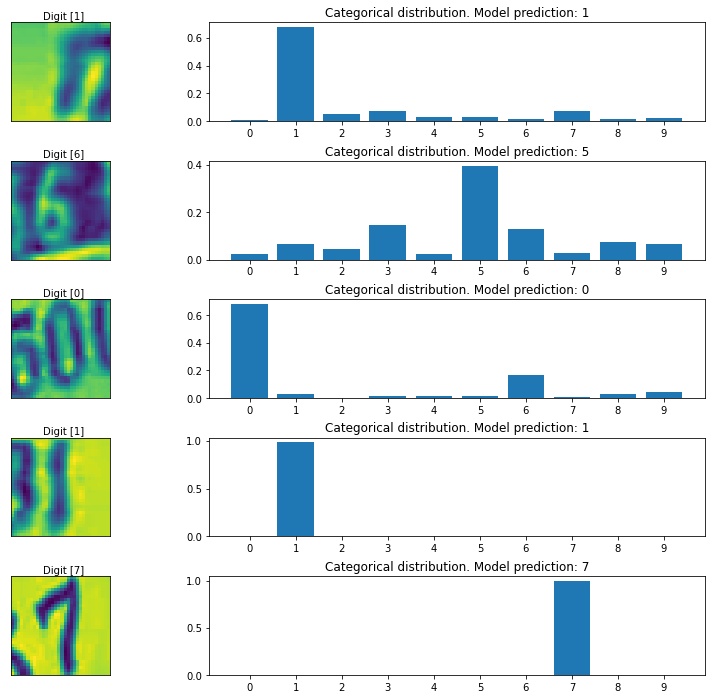

In [80]:
num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()